### Task:

Data wrangling, which consists of:
Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).

Assessing data

Cleaning data

Storing, analyzing, and visualizing wrangled data
Reporting on 1) data wrangling efforts and 2) data analyses and visualizations

# Gathering Data 

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [1]:
import pandas as pd

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_enhanced.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [4]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
image_predictions = pd.read_csv('image-predictions.tsv', delimiter='\t', encoding='utf-8')

In [6]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [7]:
import json

df_tweets = pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])

with open('tweet-json.txt', 'r') as outfile:
    for line in outfile:
        tweet_data = json.loads(line)
#         print(file)
#         tweet_id = file['id_str']
#         retweet_count = file['retweet_count']
#         favorite_count = file['favorite_count']
#         df_tweets.append(pd.DataFrame([[tweet_id,retweet_count,favorite_count]],columns=['tweet_id','retweet_count','favorite_count']))
        
        df_tweets = df_tweets.append({"tweet_id": tweet_data["id"], "retweet_count": tweet_data["retweet_count"], "favorite_count": tweet_data["favorite_count"],"date_time":pd.to_datetime(tweet_data['created_at'])}, ignore_index=True)

In [8]:
df_tweets

tweet_id retweet_count favorite_count           date_time
0     892420643555336193          8853          39467 2017-08-01 16:23:56
1     892177421306343426          6514          33819 2017-08-01 00:17:27
2     891815181378084864          4328          25461 2017-07-31 00:18:03
3     891689557279858688          8964          42908 2017-07-30 15:58:51
4     891327558926688256          9774          41048 2017-07-29 16:00:24
5     891087950875897856          3261          20562 2017-07-29 00:08:17
6     890971913173991426          2158          12041 2017-07-28 16:27:12
7     890729181411237888         16716          56848 2017-07-28 00:22:40
8     890609185150312448          4429          28226 2017-07-27 16:25:51
9     890240255349198849          7711          32467 2017-07-26 15:59:51
10    890006608113172480          7624          31166 2017-07-26 00:31:25
11    889880896479866881          5156          28268 2017-07-25 16:11:53
12    889665388333682689          8538          38818 2017-07-25 01:55:32
13    889638837579907072          4735          27672 2017-07-25 00:10:02
14    889531135344209921          2321          15359 2017-07-24 17:02:04
15    889278841981685760          5637          25652 2017-07-24 00:19:32
16    888917238123831296          4709          29611 2017-07-23 00:22:39
17    888804989199671297          4559          26080 2017-07-22 16:56:37
18    888554962724278272          3732          20290 2017-07-22 00:23:06
19    888078434458587136          3653          22201 2017-07-20 16:49:33
20    887705289381826560          5609          30779 2017-07-19 16:06:48
21    887517139158093824         12082          46959 2017-07-19 03:39:09
22    887473957103951883         18781          69871 2017-07-19 00:47:34
23    887343217045368832         10737          34222 2017-07-18 16:08:03
24    887101392804085760          6167          31061 2017-07-18 00:07:08
25    886983233522544640          8084          35859 2017-07-17 16:17:36
26    886736880519319552          3443          12306 2017-07-16 23:58:41
27    886680336477933568          4610          22798 2017-07-16 20:14:00
28    886366144734445568          3316          21524 2017-07-15 23:25:31
29    886267009285017600             4            117 2017-07-15 16:51:35
...                  ...           ...            ...                 ...
2324  666411507551481857           339            459 2015-11-17 00:24:19
2325  666407126856765440            44            113 2015-11-17 00:06:54
2326  666396247373291520            92            172 2015-11-16 23:23:41
2327  666373753744588802           100            194 2015-11-16 21:54:18
2328  666362758909284353           595            804 2015-11-16 21:10:36
2329  666353288456101888            77            229 2015-11-16 20:32:58
2330  666345417576210432           146            307 2015-11-16 20:01:42
2331  666337882303524864            96            204 2015-11-16 19:31:45
2332  666293911632134144           368            522 2015-11-16 16:37:02
2333  666287406224695296            71            152 2015-11-16 16:11:11
2334  666273097616637952            82            184 2015-11-16 15:14:19
2335  666268910803644416            37            108 2015-11-16 14:57:41
2336  666104133288665088          6871          14765 2015-11-16 04:02:55
2337  666102155909144576            16             81 2015-11-16 03:55:04
2338  666099513787052032            73            164 2015-11-16 03:44:34
2339  666094000022159362            79            169 2015-11-16 03:22:39
2340  666082916733198337            47            121 2015-11-16 02:38:37
2341  666073100786774016           174            335 2015-11-16 01:59:36
2342  666071193221509120            67            154 2015-11-16 01:52:02
2343  666063827256086533           232            496 2015-11-16 01:22:45
2344  666058600524156928            61            115 2015-11-16 01:01:59
2345  666057090499244032           146            304 2015-11-16 00:55:59
2346  66605552504240

# Assess

In [9]:
twitter_archive_enhanced

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [10]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_archive_enhanced.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [12]:
twitter_archive_enhanced.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

# Quality

There are some NaN value in some columns.

All ID columns (e.g. tweet_id, in_reply_to_status_id, retweeted_status_id) should be of object type (i.e. strings), NOT integers or floats. 

timestamp,retweeted_status_timestamp should be data time

There are None, a, an and such in name column.


In [13]:
image_predictions

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions["jpg_url"].value_counts()

https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg                                            2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                                            2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                       

In [16]:
image_predictions[image_predictions["jpg_url"]=="https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg"]

tweet_id                                          jpg_url  \
1045  712809025985978368  https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg   
1594  798697898615730177  https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg   

      img_num                  p1   p1_conf  p1_dog      p2   p2_conf  p2_dog  \
1045        1  Labrador_retriever  0.868671    True  carton  0.095095   False   
1594        1  Labrador_retriever  0.868671    True  carton  0.095095   False   

       p3   p3_conf  p3_dog  
1045  pug  0.007651    True  
1594  pug  0.007651    True

# Quality

Some jpg_url are duplicated. 




In [17]:
df_tweets

tweet_id retweet_count favorite_count           date_time
0     892420643555336193          8853          39467 2017-08-01 16:23:56
1     892177421306343426          6514          33819 2017-08-01 00:17:27
2     891815181378084864          4328          25461 2017-07-31 00:18:03
3     891689557279858688          8964          42908 2017-07-30 15:58:51
4     891327558926688256          9774          41048 2017-07-29 16:00:24
5     891087950875897856          3261          20562 2017-07-29 00:08:17
6     890971913173991426          2158          12041 2017-07-28 16:27:12
7     890729181411237888         16716          56848 2017-07-28 00:22:40
8     890609185150312448          4429          28226 2017-07-27 16:25:51
9     890240255349198849          7711          32467 2017-07-26 15:59:51
10    890006608113172480          7624          31166 2017-07-26 00:31:25
11    889880896479866881          5156          28268 2017-07-25 16:11:53
12    889665388333682689          8538          38818 2017-07-25 01:55:32
13    889638837579907072          4735          27672 2017-07-25 00:10:02
14    889531135344209921          2321          15359 2017-07-24 17:02:04
15    889278841981685760          5637          25652 2017-07-24 00:19:32
16    888917238123831296          4709          29611 2017-07-23 00:22:39
17    888804989199671297          4559          26080 2017-07-22 16:56:37
18    888554962724278272          3732          20290 2017-07-22 00:23:06
19    888078434458587136          3653          22201 2017-07-20 16:49:33
20    887705289381826560          5609          30779 2017-07-19 16:06:48
21    887517139158093824         12082          46959 2017-07-19 03:39:09
22    887473957103951883         18781          69871 2017-07-19 00:47:34
23    887343217045368832         10737          34222 2017-07-18 16:08:03
24    887101392804085760          6167          31061 2017-07-18 00:07:08
25    886983233522544640          8084          35859 2017-07-17 16:17:36
26    886736880519319552          3443          12306 2017-07-16 23:58:41
27    886680336477933568          4610          22798 2017-07-16 20:14:00
28    886366144734445568          3316          21524 2017-07-15 23:25:31
29    886267009285017600             4            117 2017-07-15 16:51:35
...                  ...           ...            ...                 ...
2324  666411507551481857           339            459 2015-11-17 00:24:19
2325  666407126856765440            44            113 2015-11-17 00:06:54
2326  666396247373291520            92            172 2015-11-16 23:23:41
2327  666373753744588802           100            194 2015-11-16 21:54:18
2328  666362758909284353           595            804 2015-11-16 21:10:36
2329  666353288456101888            77            229 2015-11-16 20:32:58
2330  666345417576210432           146            307 2015-11-16 20:01:42
2331  666337882303524864            96            204 2015-11-16 19:31:45
2332  666293911632134144           368            522 2015-11-16 16:37:02
2333  666287406224695296            71            152 2015-11-16 16:11:11
2334  666273097616637952            82            184 2015-11-16 15:14:19
2335  666268910803644416            37            108 2015-11-16 14:57:41
2336  666104133288665088          6871          14765 2015-11-16 04:02:55
2337  666102155909144576            16             81 2015-11-16 03:55:04
2338  666099513787052032            73            164 2015-11-16 03:44:34
2339  666094000022159362            79            169 2015-11-16 03:22:39
2340  666082916733198337            47            121 2015-11-16 02:38:37
2341  666073100786774016           174            335 2015-11-16 01:59:36
2342  666071193221509120            67            154 2015-11-16 01:52:02
2343  666063827256086533           232            496 2015-11-16 01:22:45
2344  666058600524156928            61            115 2015-11-16 01:01:59
2345  666057090499244032           146            304 2015-11-16 00:55:59
2346  66605552504240

In [18]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
date_time         2354 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 73.6+ KB


In [19]:
df_tweets.describe()

tweet_id  retweet_count  favorite_count            date_time
count   2.354000e+03         2354.0          2354.0                 2354
unique  2.354000e+03         1724.0          2007.0                 2354
top     6.674958e+17         3652.0             0.0  2016-09-12 15:10:21
freq    1.000000e+00            5.0           179.0                    1
first            NaN            NaN             NaN  2015-11-15 22:32:08
last             NaN            NaN             NaN  2017-08-01 16:23:56

# Quality
tweet_id, retweet_count, favorite_count, user_favourites_count and user_followers_count should be integer



# Summary for Quality



(1) There are some NaN value in some columns jpg_url.

(2) All ID columns (e.g. tweet_id, in_reply_to_status_id, retweeted_status_id) should be of object type (i.e. strings), NOT integers or floats. 

(3) Timestamp,retweeted_status_timestamp should be data time

(4) Source column contains unecessary contents.

(5) Source column should be type category

(6) Retweets(text column starts with RT @) are unecessary because we only want original dog ratings (a user can retweet their on tweet).

(7) in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id retweeted_status_timestamp columns are unecessary for prediction.

(8) There are NaN values in prediction columns (p1_dog, p2_dog, p3_dog)

(9) There are NaN values in dog stages columns (doggo, floofer, pupper, puppo )

#  Summary for Tidiness

(1) doggo, floofer, pupper, puppo columns should be combined into a single column as this is one variable that identify stage of dog. 

(2) p1_dog, p2_dog, p3_dog columns should be combined into a single column as this is one variable that identify prediction of dog.

(3) p1_conf, p2_conf, p3_conf columns should be combined into a single column as this is one variable that identify confidence.

(4) Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.


# Cleaning

### Define
(1) combine all datasets in one dataset, combine twitter_archive_enhanced & image_predictions using merge function

(2) copy the combined original dataset using copy() function

(3) drop the duplicates

(4) remove retweets(text column starts with RT @) because we only want original dog ratings (a user can retweet their on tweet). This can be done by selected rows with NaN in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

(5) drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id	retweeted_status_timestamp columns.

(6) remove objects(rows) without jpg_url

(7) clean content of source using re method

(8) combine doggo, floofer, pupper, puppo columns into a single column dog_stages using melt and drop duplicates 

(9) combine p1_dog, p2_dog, p3_dog columns into a single column predictions using melt and drop duplicates 

(10) combine p1_conf, p2_conf, p3_conf columns into a single column predictions using melt and drop duplicates 

(11) convert IDs into object type and convert source to category

(12) convert dog_stages to category type

(13) convert NaN values in prediction columns and dog_stages to None

### Code

In [20]:
# merge the dataset 
df = pd.merge(twitter_archive_enhanced, image_predictions, how='left', on=['tweet_id'])

In [21]:
df_tweets['tweet_id']=df_tweets['tweet_id'].astype(int)

In [22]:
df = pd.merge(df,df_tweets,how = 'left', on=['tweet_id'])

In [23]:
df

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [24]:
# copy the combined original dataset
df_clean = df.copy()

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

In [26]:
df_clean = df_clean.drop_duplicates()

In [27]:
# df_clean = df_clean.dropna()

In [28]:
df_clean.shape

(2356, 31)

In [29]:
# remove retweets(text column starts with RT @)
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_user_id.isnull()]
df_clean = df_clean[df_clean.retweeted_status_timestamp.isnull()]

In [30]:
df_clean = df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id'],axis=1)

In [31]:
df_clean

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
5     891087950875897856  2017-07-29 00:08:17 +0000   
6     890971913173991426  2017-07-28 16:27:12 +0000   
7     890729181411237888  2017-07-28 00:22:40 +0000   
8     890609185150312448  2017-07-27 16:25:51 +0000   
9     890240255349198849  2017-07-26 15:59:51 +0000   
10    890006608113172480  2017-07-26 00:31:25 +0000   
11    889880896479866881  2017-07-25 16:11:53 +0000   
12    889665388333682689  2017-07-25 01:55:32 +0000   
13    889638837579907072  2017-07-25 00:10:02 +0000   
14    889531135344209921  2017-07-24 17:02:04 +0000   
15    889278841981685760  2017-07-24 00:19:32 +0000   
16    888917238123831296  2017-07-23 00:22:39 +0000   
17    888804989199671297  2017-07-22 16:56:37 +0000   
18    888554962724278272  2017-07-22 00:23:06 +0000   
20    888078434458587136  2017-07-20 16:49:33 +0000   
21    887705289381826560  2017-07-19 16:06:48 +0000   
22    887517139158093824  2017-07-19 03:39:09 +0000   
23    887473957103951883  2017-07-19 00:47:34 +0000   
24    887343217045368832  2017-07-18 16:08:03 +0000   
25    887101392804085760  2017-07-18 00:07:08 +0000   
26    886983233522544640  2017-07-17 16:17:36 +0000   
27    886736880519319552  2017-07-16 23:58:41 +0000   
28    886680336477933568  2017-07-16 20:14:00 +0000   
29    886366144734445568  2017-07-15 23:25:31 +0000   
30    886267009285017600  2017-07-15 16:51:35 +0000   
...                  ...                        ...   
2326  666411507551481857  2015-11-17 00:24:19 +0000   
2327  666407126856765440  2015-11-17 00:06:54 +0000   
2328  666396247373291520  2015-11-16 23:23:41 +0000   
2329  666373753744588802  2015-11-16 21:54:18 +0000   
2330  666362758909284353  2015-11-16 21:10:36 +0000   
2331  666353288456101888  2015-11-16 20:32:58 +0000   
2332  666345417576210432  2015-11-16 20:01:42 +0000   
2333  666337882303524864  2015-11-16 19:31:45 +0000   
2334  666293911632134144  2015-11-16 16:37:02 +0000   
2335  666287406224695296  2015-11-16 16:11:11 +0000   
2336  666273097616637952  2015-11-16 15:14:19 +0000   
2337  666268910803644416  2015-11-16 14:57:41 +0000   
2338  666104133288665088  2015-11-16 04:02:55 +0000   
2339  666102155909144576  2015-11-16 03:55:04 +0000   
2340  666099513787052032  2015-11-16 03:44:34 +0000   
2341  666094000022159362  2015-11-16 03:22:39 +0000   
2342  666082916733198337  2015-11-16 02:38:37 +0000   
2343  666073100786774016  2015-11-16 01:59:36 +0000   
2344  666071193221509120  2015-11-16 01:52:02 +0000   
2345  666063827256086533  2015-11-16 01:22:45 +0000   
2346  666058600524156928  2015-11-16 01:01:59 +0000   
2347  666057090499244032  2015-11-16 00:55:59 +0000   
2348  666055525042405380  2015-11-16 00:49:46 +0000   
2349  666051853826850816  2015-11-16 00:35:11 +0000   
2350  666050758794694657  2015-11-16 00:30:50 +0000   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
5     <a href="http://twitter.com/download/iphone" r...   
6     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
8     <a href="http://twitter.com/download/iphone" r...   
9     <a href="

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-nu

In [33]:
# remove objects without jpg
df_clean = df_clean.dropna(subset = ['jpg_url'])

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-nu

In [35]:
df_clean = df_clean.dropna(subset = ['retweet_count','favorite_count','date_time'])

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-nu

In [37]:
# remove extra symbols from source
import re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
df_clean['source']=df_clean['source'].apply(lambda x : remove_tags(x))

In [38]:
df_clean.head()

tweet_id                  timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56 +0000  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27 +0000  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03 +0000  Twitter for iPhone   
3  891689557279858688  2017-07-30 15:58:51 +0000  Twitter for iPhone   
4  891327558926688256  2017-07-29 16:00:24 +0000  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer         ...         p1_dog  \
0                  10   Phineas  None    None         ...          False   
1                  10     Tilly  None    None         ...           True   
2                  10    Archie  None    None         ...           True   
3                  10     Darla  None    None         ...          False   
4                  10  Franklin  None    None         ...           True   

                   p2   p2_conf  p2_dog                           p3  \
0               bagel  0.085851   False                       banana   
1            Pekinese  0.090647    True                     papillon   
2            malamute  0.078253    True                       kelpie   
3  Labrador_retriever  0.168086    True                      spatula   
4    English_springer  0.225770    True  German_short-haired_pointer   

    p3_conf p3_dog retweet_count  favorite_count           date_time  
0  0.076110  False          8853           39467 2017-08-01 16:23:56  
1  0.068957   True          6514           33819 2017-08-01 00:17:27  
2  0.031379   True          4328           25461 2017-07-31 00:18:03  
3  0.040836  False          8964           42908 2017-07-30 15:58:51  
4  0.175219   True          9774           41048 2017-07-29 16:00:24  

[5 rows x 26 columns]

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-nu

In [40]:
# melt dog stage
columns_to_melt = ['doggo', 'floofer', 'pupper', 'puppo']
columns_to_keep = [x for x in df_clean.columns.tolist() if x not in columns_to_melt]

# melt the columns
df_clean = pd.melt(df_clean, id_vars=columns_to_keep, value_vars=columns_to_melt, 
                    var_name='stage',value_name='dog_stages')


In [41]:
df_clean = df_clean.drop('stage',1)

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 23 columns):
tweet_id              7976 non-null int64
timestamp             7976 non-null object
source                7976 non-null object
text                  7976 non-null object
expanded_urls         7976 non-null object
rating_numerator      7976 non-null int64
rating_denominator    7976 non-null int64
name                  7976 non-null object
jpg_url               7976 non-null object
img_num               7976 non-null float64
p1                    7976 non-null object
p1_conf               7976 non-null float64
p1_dog                7976 non-null object
p2                    7976 non-null object
p2_conf               7976 non-null float64
p2_dog                7976 non-null object
p3                    7976 non-null object
p3_conf               7976 non-null float64
p3_dog                7976 non-null object
retweet_count         7976 non-null object
favorite_count        7976 non-n

In [43]:
df_clean['dog_stages'].value_counts()

None       7659
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_stages, dtype: int64

In [44]:
df_clean['p1'].value_counts()

golden_retriever             556
Labrador_retriever           380
Pembroke                     352
Chihuahua                    316
pug                          216
chow                         164
Samoyed                      160
Pomeranian                   152
toy_poodle                   152
malamute                     116
cocker_spaniel               108
French_bulldog               104
Chesapeake_Bay_retriever      92
miniature_pinscher            88
seat_belt                     84
Siberian_husky                80
German_shepherd               80
Staffordshire_bullterrier     76
Eskimo_dog                    72
Maltese_dog                   72
Shetland_sheepdog             72
teddy                         72
Rottweiler                    68
Cardigan                      68
beagle                        68
Shih-Tzu                      68
Lakeland_terrier              64
kuvasz                        64
Italian_greyhound             64
web_site                      60
          

In [45]:
# remove prediction columns

predictions = []
confidence = []

def prediction_confidence(df):
    if df['p1_dog'] == True:
        predictions.append(df['p1'])
        confidence.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        predictions.append(df['p2'])
        confidence.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        predictions.append(df['p3'])
        confidence.append(df['p3_conf'])
    else:
        predictions.append('NaN')
        confidence.append(0)

df_clean.apply(prediction_confidence, axis=1)
df_clean['predictions'] = predictions
df_clean['confidence'] = confidence

# drop the other prediction columns
df_clean = df_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [46]:
df_clean

tweet_id                  timestamp              source  \
0     892420643555336193  2017-08-01 16:23:56 +0000  Twitter for iPhone   
1     892177421306343426  2017-08-01 00:17:27 +0000  Twitter for iPhone   
2     891815181378084864  2017-07-31 00:18:03 +0000  Twitter for iPhone   
3     891689557279858688  2017-07-30 15:58:51 +0000  Twitter for iPhone   
4     891327558926688256  2017-07-29 16:00:24 +0000  Twitter for iPhone   
5     891087950875897856  2017-07-29 00:08:17 +0000  Twitter for iPhone   
6     890971913173991426  2017-07-28 16:27:12 +0000  Twitter for iPhone   
7     890729181411237888  2017-07-28 00:22:40 +0000  Twitter for iPhone   
8     890609185150312448  2017-07-27 16:25:51 +0000  Twitter for iPhone   
9     890240255349198849  2017-07-26 15:59:51 +0000  Twitter for iPhone   
10    890006608113172480  2017-07-26 00:31:25 +0000  Twitter for iPhone   
11    889880896479866881  2017-07-25 16:11:53 +0000  Twitter for iPhone   
12    889665388333682689  2017-07-25 01:55:32 +0000  Twitter for iPhone   
13    889638837579907072  2017-07-25 00:10:02 +0000  Twitter for iPhone   
14    889531135344209921  2017-07-24 17:02:04 +0000  Twitter for iPhone   
15    889278841981685760  2017-07-24 00:19:32 +0000  Twitter for iPhone   
16    888917238123831296  2017-07-23 00:22:39 +0000  Twitter for iPhone   
17    888804989199671297  2017-07-22 16:56:37 +0000  Twitter for iPhone   
18    888554962724278272  2017-07-22 00:23:06 +0000  Twitter for iPhone   
19    888078434458587136  2017-07-20 16:49:33 +0000  Twitter for iPhone   
20    887705289381826560  2017-07-19 16:06:48 +0000  Twitter for iPhone   
21    887517139158093824  2017-07-19 03:39:09 +0000  Twitter for iPhone   
22    887473957103951883  2017-07-19 00:47:34 +0000  Twitter for iPhone   
23    887343217045368832  2017-07-18 16:08:03 +0000  Twitter for iPhone   
24    887101392804085760  2017-07-18 00:07:08 +0000  Twitter for iPhone   
25    886983233522544640  2017-07-17 16:17:36 +0000  Twitter for iPhone   
26    886736880519319552  2017-07-16 23:58:41 +0000  Twitter for iPhone   
27    886680336477933568  2017-07-16 20:14:00 +0000  Twitter for iPhone   
28    886366144734445568  2017-07-15 23:25:31 +0000  Twitter for iPhone   
29    886258384151887873  2017-07-15 16:17:19 +0000  Twitter for iPhone   
...                  ...                        ...                 ...   
7946  666411507551481857  2015-11-17 00:24:19 +0000  Twitter for iPhone   
7947  666407126856765440  2015-11-17 00:06:54 +0000  Twitter for iPhone   
7948  666396247373291520  2015-11-16 23:23:41 +0000  Twitter for iPhone   
7949  666373753744588802  2015-11-16 21:54:18 +0000  Twitter for iPhone   
7950  666362758909284353  2015-11-16 21:10:36 +0000  Twitter for iPhone   
7951  666353288456101888  2015-11-16 20:32:58 +0000  Twitter for iPhone   
7952  666345417576210432  2015-11-16 20:01:42 +0000  Twitter for iPhone   
7953  666337882303524864  2015-11-16 19:31:45 +0000  Twitter for iPhone   
7954  666293911632134144  2015-11-16 16:37:02 +0000  Twitter for iPhone   
7955  666287406224695296  2015-11-16 16:11:11 +0000  Twitter for iPhone   
7956  666273097616637952  2015-11-16 15:14:19 +0000  Twitter for iPhone   
7957  666268910803644416  2015-11-16 14:57:41 +0000  Twitter for iPhone   
7958  666104133288665088  2015-11-16 04:02:55 +0000  Twitter for iPhone   
7959  666102155909144576  2015-11-16 03:55:04 +0000  Twitter for iPhone   
7960  666099513787052032  2015-11-16 03:44:34 +0000  Twitter for iPhone   
7961  666094000022159362  2015-11-16 03:22:39 +0000  Twitter for iPhone   
7962  666082916733198337  2015-11-16 02:38:37 +0000  Twitter for iPhone   
7963  666073100786774016  2015-11-16 01:59:36 +0000  Twitter for iPhone   
7964  666071193221509120  2015-11-16 01:52:02 +0000  Twitter for iPhone   
7965  666063827256086533  2015-11-16 01:22:45 +0000  Twitter for iPhone   
7966  666058600524156928  2015-11-16 01:01:59 +0000  Twitter for iPhone   
7967  666057090499244032  2015-11-16 00:5

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 15 columns):
tweet_id              7976 non-null int64
timestamp             7976 non-null object
source                7976 non-null object
text                  7976 non-null object
expanded_urls         7976 non-null object
rating_numerator      7976 non-null int64
rating_denominator    7976 non-null int64
name                  7976 non-null object
jpg_url               7976 non-null object
retweet_count         7976 non-null object
favorite_count        7976 non-null object
date_time             7976 non-null datetime64[ns]
dog_stages            7976 non-null object
predictions           7976 non-null object
confidence            7976 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(10)
memory usage: 934.8+ KB


In [48]:
df_clean = df_clean.drop_duplicates()

In [49]:
df_clean

tweet_id                  timestamp              source  \
0     892420643555336193  2017-08-01 16:23:56 +0000  Twitter for iPhone   
1     892177421306343426  2017-08-01 00:17:27 +0000  Twitter for iPhone   
2     891815181378084864  2017-07-31 00:18:03 +0000  Twitter for iPhone   
3     891689557279858688  2017-07-30 15:58:51 +0000  Twitter for iPhone   
4     891327558926688256  2017-07-29 16:00:24 +0000  Twitter for iPhone   
5     891087950875897856  2017-07-29 00:08:17 +0000  Twitter for iPhone   
6     890971913173991426  2017-07-28 16:27:12 +0000  Twitter for iPhone   
7     890729181411237888  2017-07-28 00:22:40 +0000  Twitter for iPhone   
8     890609185150312448  2017-07-27 16:25:51 +0000  Twitter for iPhone   
9     890240255349198849  2017-07-26 15:59:51 +0000  Twitter for iPhone   
10    890006608113172480  2017-07-26 00:31:25 +0000  Twitter for iPhone   
11    889880896479866881  2017-07-25 16:11:53 +0000  Twitter for iPhone   
12    889665388333682689  2017-07-25 01:55:32 +0000  Twitter for iPhone   
13    889638837579907072  2017-07-25 00:10:02 +0000  Twitter for iPhone   
14    889531135344209921  2017-07-24 17:02:04 +0000  Twitter for iPhone   
15    889278841981685760  2017-07-24 00:19:32 +0000  Twitter for iPhone   
16    888917238123831296  2017-07-23 00:22:39 +0000  Twitter for iPhone   
17    888804989199671297  2017-07-22 16:56:37 +0000  Twitter for iPhone   
18    888554962724278272  2017-07-22 00:23:06 +0000  Twitter for iPhone   
19    888078434458587136  2017-07-20 16:49:33 +0000  Twitter for iPhone   
20    887705289381826560  2017-07-19 16:06:48 +0000  Twitter for iPhone   
21    887517139158093824  2017-07-19 03:39:09 +0000  Twitter for iPhone   
22    887473957103951883  2017-07-19 00:47:34 +0000  Twitter for iPhone   
23    887343217045368832  2017-07-18 16:08:03 +0000  Twitter for iPhone   
24    887101392804085760  2017-07-18 00:07:08 +0000  Twitter for iPhone   
25    886983233522544640  2017-07-17 16:17:36 +0000  Twitter for iPhone   
26    886736880519319552  2017-07-16 23:58:41 +0000  Twitter for iPhone   
27    886680336477933568  2017-07-16 20:14:00 +0000  Twitter for iPhone   
28    886366144734445568  2017-07-15 23:25:31 +0000  Twitter for iPhone   
29    886258384151887873  2017-07-15 16:17:19 +0000  Twitter for iPhone   
...                  ...                        ...                 ...   
5624  672622327801233409  2015-12-04 03:43:54 +0000  Twitter for iPhone   
5625  672614745925664768  2015-12-04 03:13:46 +0000  Twitter for iPhone   
5628  672594978741354496  2015-12-04 01:55:13 +0000  Twitter for iPhone   
5635  672481316919734272  2015-12-03 18:23:34 +0000  Twitter for iPhone   
5642  672254177670729728  2015-12-03 03:21:00 +0000  Twitter for iPhone   
5648  672205392827572224  2015-12-03 00:07:09 +0000  Twitter for iPhone   
5650  672160042234327040  2015-12-02 21:06:56 +0000  Twitter for iPhone   
5994  889665388333682689  2017-07-25 01:55:32 +0000  Twitter for iPhone   
5996  889531135344209921  2017-07-24 17:02:04 +0000  Twitter for iPhone   
6044  878776093423087618  2017-06-25 00:45:22 +0000  Twitter for iPhone   
6060  874012996292530176  2017-06-11 21:18:31 +0000  Twitter for iPhone   
6087  867421006826221569  2017-05-24 16:44:18 +0000  Twitter for iPhone   
6116  859607811541651456  2017-05-03 03:17:27 +0000  Twitter for iPhone   
6130  855851453814013952  2017-04-22 18:31:02 +0000  Twitter for iPhone   
6279  825535076884762624  2017-01-29 02:44:34 +0000  Twitter for iPhone   
6281  825026590719483904  2017-01-27 17:04:02 +0000  Twitter for iPhone   
6291  822872901745569793  2017-01-21 18:26:02 +0000  Twitter for iPhone   
6308  819952236453363712  2017-01-13 17:00:21 +0000  Twitter for iPhone   
6394  803773340896923648  2016-11-30 01:31:12 +0000  Twitter for iPhone   
6402  802239329049477120  2016-11-25 19:55:35 +0000  Twitter for iPhone   
6448  793195938047070209  2016-10-31 21:00:23 +0000  Twitter for iPhone   
6463  790946055508652032  2016-10-25 16:0

In [50]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(object)
df_clean['timestamp'] = pd.to_datetime(df_clean.timestamp)
df_clean['source'] = df_clean['source'].astype('category')
df_clean['dog_stages'] = df_clean['dog_stages'].astype('category')



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [56]:
# convert all null value to none
df_clean.loc[df_clean['predictions'] == 'NaN', 'predictions'] = None
df_clean.loc[df_clean['dog_stages'] == 'NaN', 'dog_stages'] = None

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Test

In [69]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 6795
Data columns (total 15 columns):
tweet_id              2311 non-null object
timestamp             2311 non-null datetime64[ns]
source                2311 non-null category
text                  2311 non-null object
expanded_urls         2311 non-null object
rating_numerator      2311 non-null int64
rating_denominator    2311 non-null int64
name                  2311 non-null object
jpg_url               2311 non-null object
retweet_count         2311 non-null object
favorite_count        2311 non-null object
date_time             2311 non-null datetime64[ns]
dog_stages            2311 non-null category
predictions           1956 non-null object
confidence            2311 non-null float64
dtypes: category(2), datetime64[ns](2), float64(1), int64(2), object(8)
memory usage: 257.6+ KB


In [70]:
df_clean

tweet_id           timestamp              source  \
0     892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1     892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2     891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3     891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4     891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   
5     891087950875897856 2017-07-29 00:08:17  Twitter for iPhone   
6     890971913173991426 2017-07-28 16:27:12  Twitter for iPhone   
7     890729181411237888 2017-07-28 00:22:40  Twitter for iPhone   
8     890609185150312448 2017-07-27 16:25:51  Twitter for iPhone   
9     890240255349198849 2017-07-26 15:59:51  Twitter for iPhone   
10    890006608113172480 2017-07-26 00:31:25  Twitter for iPhone   
11    889880896479866881 2017-07-25 16:11:53  Twitter for iPhone   
12    889665388333682689 2017-07-25 01:55:32  Twitter for iPhone   
13    889638837579907072 2017-07-25 00:10:02  Twitter for iPhone   
14    889531135344209921 2017-07-24 17:02:04  Twitter for iPhone   
15    889278841981685760 2017-07-24 00:19:32  Twitter for iPhone   
16    888917238123831296 2017-07-23 00:22:39  Twitter for iPhone   
17    888804989199671297 2017-07-22 16:56:37  Twitter for iPhone   
18    888554962724278272 2017-07-22 00:23:06  Twitter for iPhone   
19    888078434458587136 2017-07-20 16:49:33  Twitter for iPhone   
20    887705289381826560 2017-07-19 16:06:48  Twitter for iPhone   
21    887517139158093824 2017-07-19 03:39:09  Twitter for iPhone   
22    887473957103951883 2017-07-19 00:47:34  Twitter for iPhone   
23    887343217045368832 2017-07-18 16:08:03  Twitter for iPhone   
24    887101392804085760 2017-07-18 00:07:08  Twitter for iPhone   
25    886983233522544640 2017-07-17 16:17:36  Twitter for iPhone   
26    886736880519319552 2017-07-16 23:58:41  Twitter for iPhone   
27    886680336477933568 2017-07-16 20:14:00  Twitter for iPhone   
28    886366144734445568 2017-07-15 23:25:31  Twitter for iPhone   
29    886258384151887873 2017-07-15 16:17:19  Twitter for iPhone   
...                  ...                 ...                 ...   
5624  672622327801233409 2015-12-04 03:43:54  Twitter for iPhone   
5625  672614745925664768 2015-12-04 03:13:46  Twitter for iPhone   
5628  672594978741354496 2015-12-04 01:55:13  Twitter for iPhone   
5635  672481316919734272 2015-12-03 18:23:34  Twitter for iPhone   
5642  672254177670729728 2015-12-03 03:21:00  Twitter for iPhone   
5648  672205392827572224 2015-12-03 00:07:09  Twitter for iPhone   
5650  672160042234327040 2015-12-02 21:06:56  Twitter for iPhone   
5994  889665388333682689 2017-07-25 01:55:32  Twitter for iPhone   
5996  889531135344209921 2017-07-24 17:02:04  Twitter for iPhone   
6044  878776093423087618 2017-06-25 00:45:22  Twitter for iPhone   
6060  874012996292530176 2017-06-11 21:18:31  Twitter for iPhone   
6087  867421006826221569 2017-05-24 16:44:18  Twitter for iPhone   
6116  859607811541651456 2017-05-03 03:17:27  Twitter for iPhone   
6130  855851453814013952 2017-04-22 18:31:02  Twitter for iPhone   
6279  825535076884762624 2017-01-29 02:44:34  Twitter for iPhone   
6281  825026590719483904 2017-01-27 17:04:02  Twitter for iPhone   
6291  822872901745569793 2017-01-21 18:26:02  Twitter for iPhone   
6308  819952236453363712 2017-01-13 17:00:21  Twitter for iPhone   
6394  803773340896923648 2016-11-30 01:31:12  Twitter for iPhone   
6402  802239329049477120 2016-11-25 19:55:35  Twitter for iPhone   
6448  793195938047070209 2016-10-31 21:00:23  Twitter for iPhone   
6463  790946055508652032 2016-10-25 16:00:09  Twitter for iPhone   
6481  787717603741622272 2016-10-16 18:11:26  Twitter for iPhone   
6516  780931614150983680 2016-09-28 00:46:20  Twitter for iPhone   
6661  756275833623502848 2016-07-21 23:53:04  Twitter for iPhone   
6680  752519690950500352 2016-07-11 15:07:30  Twitter for iPhone   
6691  751132876104687617 2016-07-07 19:16:47  Twitter for iPhone   
6753

# Storing

In [57]:
# save the dataframe to a file
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyzing, and Visualizing Data

- The top 10 Tweets favorited by most users?

- The source distribution

- The relationship between retweet and favorite

- What are the most common breeds found by the neural network?

In [58]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('twitter_archive_master.csv')
df_copy = df.copy()

In [60]:
df_copy.sort_values(by='favorite_count',ascending=False,inplace=True)

In [61]:
df_top10 = df_copy[:10]
df_top10

tweet_id            timestamp              source  \
309   822872901745569793  2017-01-21 18:26:02  Twitter for iPhone   
2297  822872901745569793  2017-01-21 18:26:02  Twitter for iPhone   
775   744234799360020481  2016-06-18 18:26:18  Twitter for iPhone   
2062  744234799360020481  2016-06-18 18:26:18  Twitter for iPhone   
58    879415818425184262  2017-06-26 19:07:24  Twitter for iPhone   
400   807106840509214720  2016-12-09 06:17:20  Twitter for iPhone   
108   866450705531457537  2017-05-22 00:28:40  Twitter for iPhone   
2082  866450705531457537  2017-05-22 00:28:40  Twitter for iPhone   
2024  819004803107983360  2017-01-11 02:15:36  Twitter for iPhone   
333   819004803107983360  2017-01-11 02:15:36  Twitter for iPhone   

                                                   text  \
309   Here's a super supportive puppo participating ...   
2297  Here's a super supportive puppo participating ...   
775   Here's a doggo realizing you can stand in a po...   
2062  Here's a doggo realizing you can stand in a po...   
58    This is Duddles. He did an attempt. 13/10 some...   
400   This is Stephan. He just wants to help. 13/10 ...   
108   This is Jamesy. He gives a kiss to every other...   
2082  This is Jamesy. He gives a kiss to every other...   
2024  This is Bo. He was a very good First Doggo. 14...   
333   This is Bo. He was a very good First Doggo. 14...   

                                          expanded_urls  rating_numerator  \
309   https://twitter.com/dog_rates/status/822872901...                13   
2297  https://twitter.com/dog_rates/status/822872901...                13   
775   https://twitter.com/dog_rates/status/744234799...                13   
2062  https://twitter.com/dog_rates/status/744234799...                13   
58    https://twitter.com/dog_rates/status/879415818...                13   
400   https://twitter.com/dog_rates/status/807106840...                13   
108   https://twitter.com/dog_rates/status/866450705...                13   
2082  https://twitter.com/dog_rates/status/866450705...                13   
2024  https://twitter.com/dog_rates/status/819004803...                14   
333   https://twitter.com/dog_rates/status/819004803...                14   

      rating_denominator     name  \
309                   10     None   
2297                  10     None   
775                   10     None   
2062                  10     None   
58                    10  Duddles   
400                   10  Stephan   
108                   10   Jamesy   
2082                  10   Jamesy   
2024                  10       Bo   
333                   10       Bo   

                                                jpg_url  retweet_count  \
309     https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg          48265   
2297    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg          48265   
775   https://pbs.twimg.com/ext_tw_video_thumb/74423...          79515   
2062  https://pbs.twimg.com/ext_tw_video_thumb/74423...          79515   
58    https://pbs.twimg.com/ext_tw_video_thumb/87941...          45849   
400   https://pbs.twimg.com/ext_tw_video_thumb/80710...          56625   
108     https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg          32883   
2082    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg          32883   
2024    https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg          42228   
333     https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg          42228   

      favorite_count            date_time dog_stages         predictions  \
309           132810  2017-01-21 18:26:02       None    Lakeland_terrier   
2297          132810  2017-01-21 18:26:02      puppo    Lakeland_terrier   
775           131075  2016-06-18 18:26:18      doggo  Labrador_retriever   
2062          131075  2016-06-18 18:26:18       None  Labrador_retriever   
58            107956  2017-06-26 19:07:24       None    English_springer   
400           107015  2016-12-09 06:17:20       None           Chihuahua   
108

Text(0.5,1,'Top 10 favorated tweets')

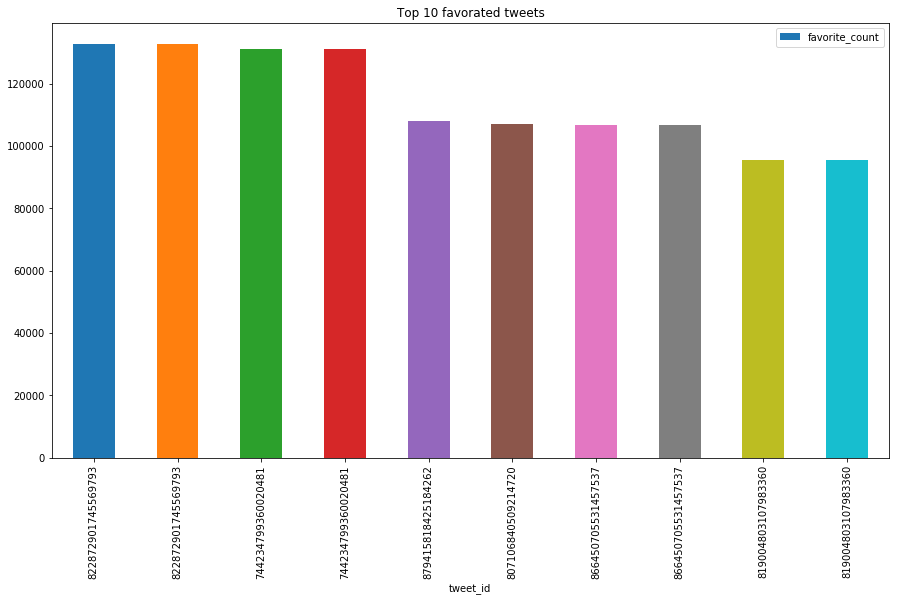

In [62]:
df_top10.plot.bar(x='tweet_id',y='favorite_count',figsize=(15,8))
plt.title('Top 10 favorated tweets')

Text(0.5,1,'Source distribution')

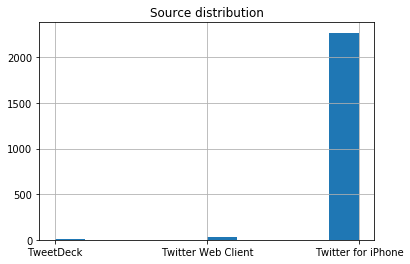

In [63]:
df_copy.source.hist()
plt.title('Source distribution')

Text(0.5,1,'Retweets and favorites Scatter plot')

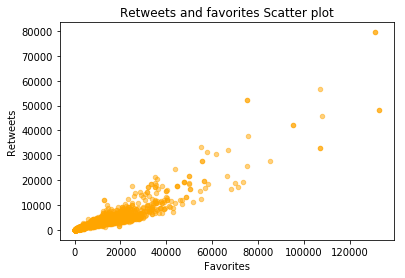

In [64]:
df_copy.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, color = 'orange')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

In [65]:
df_copy['predictions'].value_counts()


golden_retriever                  196
Labrador_retriever                128
Pembroke                          108
Chihuahua                         100
pug                                73
toy_poodle                         59
Pomeranian                         53
chow                               51
Samoyed                            48
malamute                           36
cocker_spaniel                     35
French_bulldog                     35
Chesapeake_Bay_retriever           34
German_shepherd                    28
miniature_pinscher                 28
Eskimo_dog                         28
Staffordshire_bullterrier          24
Lakeland_terrier                   24
Siberian_husky                     23
Cardigan                           23
Shetland_sheepdog                  22
Shih-Tzu                           22
kuvasz                             21
Maltese_dog                        21
Rottweiler                         21
beagle                             21
Italian_grey

In [66]:
predictions_sum = df_copy.groupby('predictions').sum()

In [67]:
df_copy['predictions'].value_counts().index

Index(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'toy_poodle', 'Pomeranian', 'chow', 'Samoyed', 'malamute',
       ...
       'Australian_terrier', 'clumber', 'Sussex_spaniel', 'silky_terrier',
       'Bouvier_des_Flandres', 'Irish_wolfhound', 'standard_schnauzer',
       'Japanese_spaniel', 'Scotch_terrier', 'EntleBucher'],
      dtype='object', length=113)

Text(0,0.5,'Propotion of no show ')

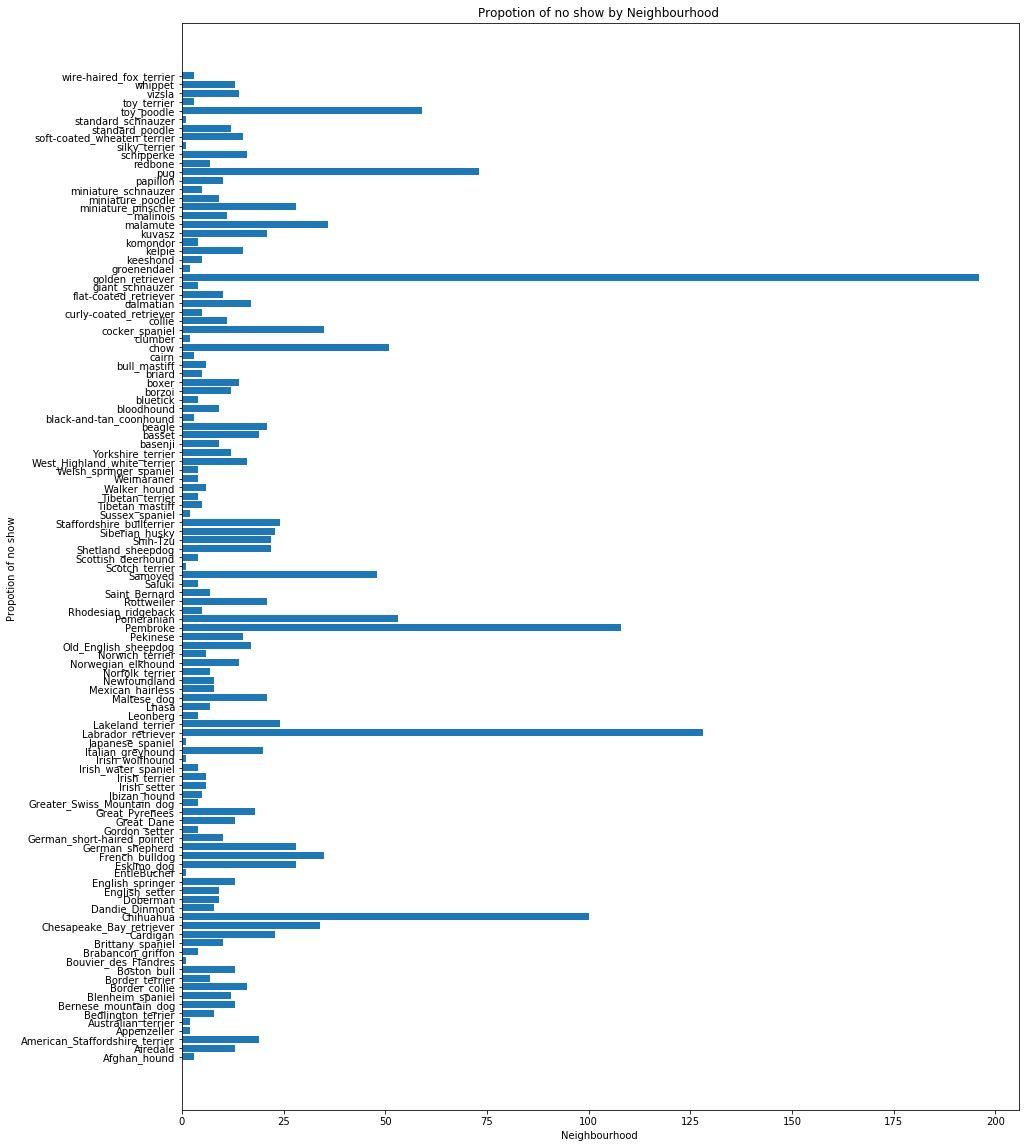

In [68]:
plt.figure(figsize=(15,20))

plt.barh(df_copy['predictions'].value_counts().index, df_copy['predictions'].value_counts())
plt.title("Propotion of no show by Neighbourhood ")
plt.xlabel("Neighbourhood ")
plt.ylabel("Propotion of no show ")

# Conclusion
- The most popular Tweet favorited by users with tweet_id 822872901745569793 

- The most of the source are from tweeter for iphone. And few from TweetDeck

- The relationship between retweets and favorited is positive

- The most common breeds found by the neural network is golden_retriever
